# Edge Detection on the Berkley Dataset

In this notebook, I will use my knowledge on the `datablock` API, to quickly load and visualize the **BSED** dataset

In [1]:
from fastai.vision import *

## Investigating the data structure

In [4]:
from pathlib import Path

path = Path("/home/anass/HED-BSDS/")
path.ls()

[PosixPath('/home/anass/HED-BSDS/train_pair.lst'),
 PosixPath('/home/anass/HED-BSDS/test'),
 PosixPath('/home/anass/HED-BSDS/test.lst'),
 PosixPath('/home/anass/HED-BSDS/train')]

As we can see from the outptu of the dataset. It has two folders `train` and `test` and a file listing the paris `train_pair.lst`

In [47]:
import numpy as np
pair_list = np.loadtxt(path/'train_pair.lst',dtype=str)

dictionnary_pair = {}

for img in pair_list:
    dictionnary_pair[img[0]]= img[1]
    
print(dictionnary_pair)

codes = ['edge', 'continous']

{'train/aug_data/0.0_1_0/100075.jpg': 'train/aug_gt/0.0_1_0/100075.png', 'train/aug_data/0.0_1_0/100080.jpg': 'train/aug_gt/0.0_1_0/100080.png', 'train/aug_data/0.0_1_0/100098.jpg': 'train/aug_gt/0.0_1_0/100098.png', 'train/aug_data/0.0_1_0/101085.jpg': 'train/aug_gt/0.0_1_0/101085.png', 'train/aug_data/0.0_1_0/101087.jpg': 'train/aug_gt/0.0_1_0/101087.png', 'train/aug_data/0.0_1_0/102061.jpg': 'train/aug_gt/0.0_1_0/102061.png', 'train/aug_data/0.0_1_0/103041.jpg': 'train/aug_gt/0.0_1_0/103041.png', 'train/aug_data/0.0_1_0/103070.jpg': 'train/aug_gt/0.0_1_0/103070.png', 'train/aug_data/0.0_1_0/104022.jpg': 'train/aug_gt/0.0_1_0/104022.png', 'train/aug_data/0.0_1_0/105019.jpg': 'train/aug_gt/0.0_1_0/105019.png', 'train/aug_data/0.0_1_0/105025.jpg': 'train/aug_gt/0.0_1_0/105025.png', 'train/aug_data/0.0_1_0/105053.jpg': 'train/aug_gt/0.0_1_0/105053.png', 'train/aug_data/0.0_1_0/106020.jpg': 'train/aug_gt/0.0_1_0/106020.png', 'train/aug_data/0.0_1_0/106024.jpg': 'train/aug_gt/0.0_1_0/1060

In [56]:
path_img = path/'train'/'aug_data'

get_y_func = lambda x: Path(str(x).replace('aug_data',"aug_gt").replace(".jpg",".png"))    #name of the gt 
data = (SegmentationItemList.from_folder(path_img)          #source of the files
        .split_by_rand_pct()                                # Split by random validation set 20%
        .label_from_func(get_y_func,classes=codes)         # get labes by replacing the name of the file
        .transform(get_transforms(), tfm_y=True, size=128)  #transform the data
        .databunch()
       )

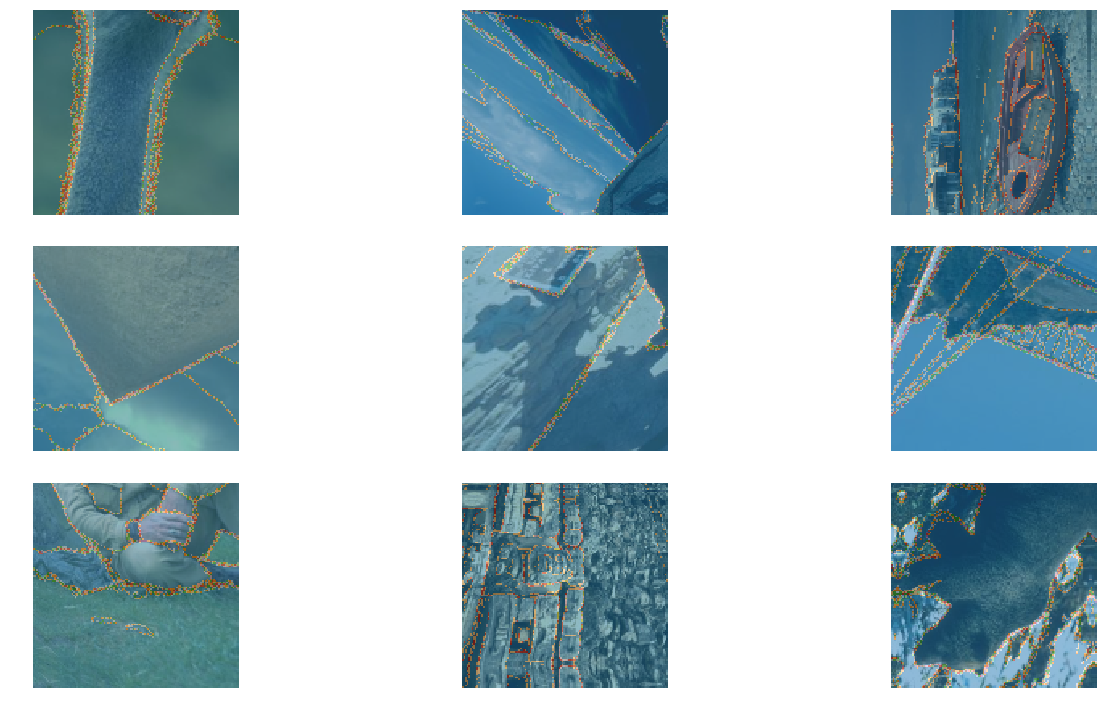

In [58]:
data.show_batch(3,figsize=(20,10))